# 239. 滑动窗口最大值 (Sliding Window Maximum)
[力扣题目链接](https://leetcode.cn/problems/sliding-window-maximum/)
### 题目描述
给你一个整数数组 `nums`，有一个大小为 `k` 的滑动窗口从数组的最左侧移动到数组的最右侧。你只可以看到在滑动窗口内的 `k` 个数字。滑动窗口每次只向右移动一位。

返回 **滑动窗口中的最大值** 。

---

### 示例 1：
**输入**：nums = [1,3,-1,-3,5,3,6,7], k = 3<br/>
**输出**：[3,3,5,5,6,7]<br/>
**解释**：

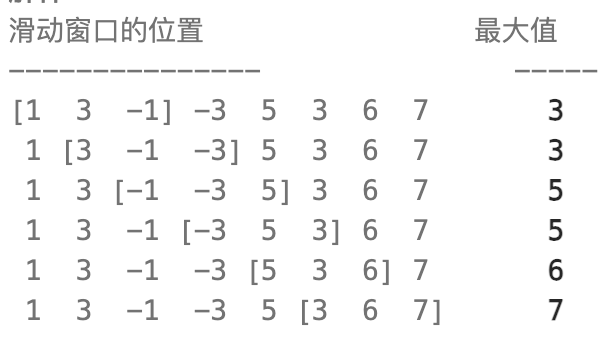

### 示例 2：
**输入**：nums = [1], k = 1<br/>
**输出**：[1]

---

### 提示：
* $1 <= nums.length <= 10^5$
* $-10^4 <= nums[i] <= 10^4$
* $1 <= k <= nums.length$


### 📝 算法笔记：滑动窗口最大值 (单调队列)

#### 1. 核心挑战

在一个长度为  的数组中，窗口大小为 。如果使用暴力法（每次滑动都遍历窗口找最大值），复杂度是 。**单调队列**的目标是将复杂度降为 ****。

#### 2. 核心神器：单调队列 (Monotonic Queue)

单调队列不是一种现成的标准库，而是一种**维护逻辑**。它要求队列中的元素始终保持**单调递减**（队首最大，队尾最小）。

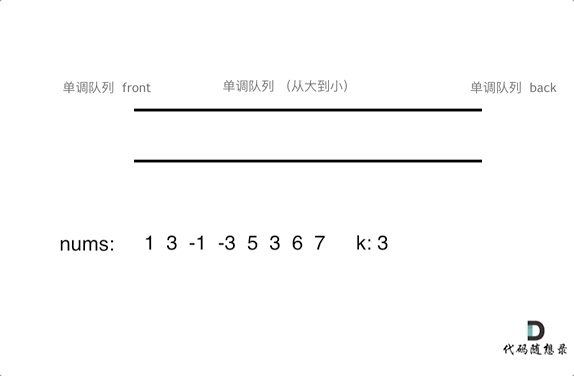

* **入队 (Push) 规则**：
* 新元素从队尾进入。
* **“清场”**：如果新元素比队尾的元素大，则将队尾元素弹出（Pop Back），直到遇到更大的元素或队列为空。
* **原理**：既然新元素比你大，还比你“年轻”（更晚滑出窗口），只要他在，你就不可能成为最大值，所以你可以被永久淘汰。


* **出队 (Pop) 规则**：
* 窗口向右滑动时，检查理论上该离开窗口的值（`nums[i-k]`）。
* **“校验”**：只有当该离开的值等于**队首元素**时，才执行出队（Pop Front）。如果不等，说明它早就在 Push 阶段被更强的人踢走了。


* **查询 (Front) 规则**：
* 队首元素（Queue[0]）永远是当前窗口的最大值。



#### 3. 代码实现 (高性能指针版)

这是 LeetCode 效率最高的实现方式，利用数组模拟双端队列：

```python
def maxSlidingWindow(nums, k):
    n = len(nums)
    # dq 存储的是 nums 的下标（Index）
    dq = [0] * n 
    front, rear = 0, -1
    res = []

    for i in range(n):
        # 1. 维护单调性：踢走队尾所有比当前值小的元素
        while front <= rear and nums[dq[rear]] <= nums[i]:
            rear -= 1
        
        # 2. 入队当前下标
        rear += 1
        dq[rear] = i
        
        # 3. 维护窗口有效性：检查队首下标是否已经超出窗口左边界
        if dq[front] < i - k + 1:
            front += 1
        
        # 4. 窗口形成后（索引达到 k-1），开始记录结果
        if i >= k - 1:
            res.append(nums[dq[front]])
            
    return res

```

#### 4. 为什么存“下标”而不是“数值”？

1. **方便查找**：通过 `nums[dq[front]]` 可以拿到数值。
2. **方便判断过期**：通过 `dq[front] < i - k + 1` 可以瞬间知道队首元素是否还在窗口内，不需要额外传值给 `pop` 函数。

#### 5. 复杂度分析

* **时间复杂度**：$O(n)$。虽然有 `while` 循环，但每个元素最多进队一次、出队一次。
* **空间复杂度**：$O(k)$。单调队列中最多同时存放  个元素的下标。

思路：



In [ ]:
#单调序列(Monotonic Queue)时间复杂度O(n)
from collections import deque

class MyQueue: # 我的首要任务是每一个操作都要保证队首的元素是queue里最大的元素
    def __init__(self):
        self.queue = deque()

    #每次弹出时比较弹出的数值是否等于队列出口元素的数值，如果相等，则弹出
    #因为我们本来要弹出的元素可能早已经被弹出，需要用数值确认不要弹错
    def pop(self,value):
        if self.queue and value == self.queue[0]:
            self.queue.popleft()
    
    #如果新数值大于队尾的数字，直接踢走队尾的数字，一直到碰到更大数字为止
    # 这里比一般的单调队列多了一个踢走back的功能
    def push(self,value):
        while self.queue and value > self.queue[-1]:
            self.queue.pop()
        self.queue.append(value)

    def front(self):
        return self.queue[0]
        
class Solution(object):
    def maxSlidingWindow(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        que = MyQueue()
        result = []
        for i in range(k):
            que.push(nums[i])
        result.append(que.front())

        for i in range(k,len(nums)):
            que.pop(nums[i-k]) #移除窗口最前面的元素
            que.push(nums[i]) #加入最前面的元素
            result.append(que.front())
        return result

        


In [ ]:
#暴力法复杂度O(n*k)，最坏情况下必然超时
class Solution(object):
    def maxSlidingWindow(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        max_list = []

        for i in range(len(nums)-k+1):
            max_list.append(max(nums[i:i+k]))
        return(max_list)


In [ ]:
class Solution(object):
    def maxSlidingWindow(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """

        nums_len = len(nums)
        dq = [0] * nums_len #index而非value
        rear = -1           #队尾指针，类似右端
        front = 0           #队首指针，类似左端
        #初始化第一个窗口，(i从0到k-1)
        for i in range(min(k, nums_len)):
            if rear < front:  #队列空了
                rear += 1
                dq[rear] = i  #直接入队
            else:
                while front <= rear and nums[dq[rear]] <= nums[i]:
                    rear -= 1           
                rear += 1
                dq[rear] = i
        if k > nums_len:
            return dq[0:1]
        res = []
        res.append(nums[dq[0]])
        for i in range(k, nums_len):
            if dq[front] < i-k+1:
                front += 1
            while front <= rear and nums[dq[rear]] <= nums[i]:
                rear -= 1
            rear += 1
            dq[rear] = i
            res.append(nums[dq[front]])
        return res
